<a href="https://colab.research.google.com/github/WonminSong/AI/blob/master/ml_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://hunkim.github.io/ml/ 강의를 복습하며 만들었습니다

In [1]:
!pip install tensorflow==1.0
import tensorflow as tf
#텐서플로우 1.0버전 설치

     |████████████████████████████████| 44.5MB 90kB/s 
  Found existing installation: tensorflow 2.4.0
    Uninstalling tensorflow-2.4.0:
      Successfully uninstalled tensorflow-2.4.0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:473: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:474: FutureWarning: Passing (type, 1) or 

In [2]:
hello = tf.constant("Hello,tf")
sess = tf.Session()
print(sess.run(hello))
#node의 개념을 이해한다.

b'Hello,tf'


In [3]:
tf.__version__
#버전을 출력하여 잘 설치되었는지 확인한다.

'1.0.0'

In [4]:
node1 = tf.constant(3.0,tf.float32)
node2 = tf.constant(4.0)
node3 = tf.add(node1,node2)
#그래프의 모양을 상상해본다.

In [5]:
print("node1 :",node1,"node2 :",node2) 
print("node3",node3)
#python처럼 출력해본다.

node1 : Tensor("Const_1:0", shape=(), dtype=float32) node2 : Tensor("Const_2:0", shape=(), dtype=float32)
node3 Tensor("Add:0", shape=(), dtype=float32)


In [6]:
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(node3): ", sess.run(node3))
#그래프의 개념을 이해한다.
#그래프를 실행시킨 값을 출력 할 수 있다.

sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0


In [7]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b

print(sess.run(adder_node, feed_dict={a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict={a: [1,3], b: [2, 4]}))
#placeholder의 개념을 이해한다
#값의 자료형을 지정하면 나중에 그래프 실행과정에서 값을 유동적으로 줄 수 있다.

7.5
[3. 7.]


In [8]:
x_train = [1,2,3]
y_train = [1,2,3]
#train_set을 준비한다.

In [9]:
w = tf.Variable(tf.random_normal([1]),name='weight')
b = tf.Variable(tf.random_normal([1]),name='bias')
#linear Regression에 필요한 weight과 bias를 준비한다.

In [10]:
hypothesis = x_train * w + b
#예측값을 만드는 함수를 만든다.

In [11]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train))
#cost함수를 만든다
#예측값과 실측값의 차이를 제곱한 것의 평균이다.

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#GradientDescent를 이용하여 가장 좋은 cost값을 찾도록 한다.
#learning_rate값에 영향을 받아서 최저점 쪽으로 이동한다.
#최저점의 방향은 미분을 이용한다.

In [13]:
sess = tf.Session()
#세션

In [14]:
sess.run(tf.global_variables_initializer())
#변수 초기화

In [15]:
for step in range(2001):
  sess.run(train)
  if step%20==0:
    print(step,sess.run(cost),sess.run(w),sess.run(b))
#train그래프를 실행하며 cost값이 나아지는지 확인한다.

0 16.882172 [-1.0233402] [0.2846463]
20 0.27802354 [0.43594077] [0.8713792]
40 0.11600944 [0.5923468] [0.88756967]
60 0.10412401 [0.6238738] [0.85129815]
80 0.094555914 [0.64272803] [0.8118084]
100 0.08587708 [0.65963066] [0.7737058]
120 0.07799487 [0.67563754] [0.73734903]
140 0.070836164 [0.6908823] [0.7026967]
160 0.06433458 [0.7054098] [0.66967255]
180 0.058429707 [0.7192545] [0.63820046]
200 0.05306676 [0.7324486] [0.6082073]
220 0.048196103 [0.7450225] [0.5796239]
240 0.043772478 [0.7570056] [0.55238366]
260 0.03975487 [0.7684253] [0.52642375]
280 0.036105998 [0.77930844] [0.5016839]
300 0.03279207 [0.78968006] [0.47810662]
320 0.0297823 [0.79956436] [0.4556374]
340 0.027048737 [0.8089841] [0.43422407]
360 0.02456609 [0.8179612] [0.41381708]
380 0.022311332 [0.8265164] [0.3943692]
400 0.0202635 [0.83466935] [0.37583533]
420 0.018403653 [0.84243935] [0.35817242]
440 0.01671449 [0.84984416] [0.34133962]
460 0.015180364 [0.8569008] [0.32529795]
480 0.01378705 [0.863626] [0.3100102]


In [16]:
import matplotlib.pyplot as plt
#그래프를 그리기 위한 라이브러리를 추가한다

In [17]:
x = [1,2,3]
y = [1,2,3]
#train set

In [18]:
w = tf.placeholder(tf.float32)
hypothesis = x*w
#linear regression식을 간소화한다

In [19]:
cost = tf.reduce_mean(tf.square(hypothesis - y))
#cost함수

In [20]:
sess = tf.Session()
#세션

In [21]:
sess.run(tf.global_variables_initializer())
#변수 초기화

In [22]:
w_val=[]
cost_val=[]
for i in range(-30,50):
  feed_w=i*0.1
  curr_cost, curr_w=sess.run([cost,w],feed_dict={w:feed_w})
  w_val.append(curr_w)
  cost_val.append(curr_cost)
#cost와 w값을 구한다.

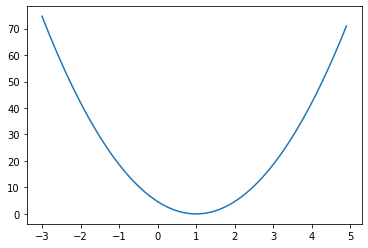

In [23]:
plt.plot(w_val, cost_val)
plt.show()
#그래프로 표시한다

In [24]:
x1_data = [73.,93.,89.,96.,73.]
x2_data = [80.,88.,91.,98.,66.]
x3_data = [75.,93.,90.,100.,70.]
y_data = [152.,185.,180.,196.,142]
#데이터들

In [25]:
x1 = tf.placeholder(tf.float32)
x2 = tf.placeholder(tf.float32)
x3 = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
#각 데이터 마다 x값

In [26]:
w1 = tf.Variable(tf.random_normal([1]),name='weight1')
w2 = tf.Variable(tf.random_normal([1]),name='weight2')
w3 = tf.Variable(tf.random_normal([1]),name='weight3')
b = tf.Variable(tf.random_normal([1]),name='bias')
#가중치

In [27]:
hypothesis = x1*w1+x2*w2+x3*w3+b
#linear 식

In [28]:
cost = tf.reduce_mean(tf.square(hypothesis-y))
#cost 식

In [29]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
#gradient descent를 사용한다

In [30]:
train = optimizer.minimize(cost)
#train그래프

In [31]:
sess=tf.Session()
#세션

In [32]:
sess.run(tf.global_variables_initializer())
#ㄱㄱ

In [33]:
for step in range(20001):
  cost_val, hy_val, _ = sess.run([cost,hypothesis,train],feed_dict={x1:x1_data,x2:x2_data,x3:x3_data,y:y_data})

  if step%10==0:
    print(step,"Cost: ",cost_val,"\nprediction:\n", hy_val)
#cost와 예측값을 계산한다

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
prediction:
 [153.7577  183.3954  181.9709  193.82123 142.70532]
3350 Cost:  2.9550848 
prediction:
 [153.75479 183.39735 181.9699  193.82126 142.70729]
3360 Cost:  2.951592 
prediction:
 [153.75185 183.39929 181.96893 193.82123 142.70921]
3370 Cost:  2.948053 
prediction:
 [153.74892 183.40125 181.96793 193.82123 142.71117]
3380 Cost:  2.9445195 
prediction:
 [153.74597 183.40317 181.96693 193.82124 142.71309]
3390 Cost:  2.941046 
prediction:
 [153.74307 183.4051  181.96594 193.82123 142.71503]
3400 Cost:  2.937613 
prediction:
 [153.74016 183.407   181.96498 193.82121 142.71693]
3410 Cost:  2.9340978 
prediction:
 [153.73723 183.40894 181.96397 193.82121 142.71884]
3420 Cost:  2.9306788 
prediction:
 [153.73438 183.41086 181.96301 193.82123 142.72076]
3430 Cost:  2.9271722 
prediction:
 [153.73148 183.41277 181.96202 193.82129 142.72266]
3440 Cost:  2.9237852 
prediction:
 [153.72858 183.41466 181.96106 193.82126 142.72455]
3450 Cost:  2.9203796 


In [34]:
x_data = [[73., 80., 75.], [93., 88., 93.],
         [89., 91., 90.], [96., 98., 100.], [73., 66., 70.]]
y_data = [[152.], [185.], [180.], [196.], [142.]]
#데이터

In [35]:
x = tf.placeholder(tf.float32,shape=[None,3])
y = tf.placeholder(tf.float32,shape=[None,1])
#data의 shape에 맞춰 x와 y를 정한다

In [36]:
w = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
#weight값과 bias값

In [37]:
hypothesis = tf.matmul(x,w)+b
#다수의 데이터를 처리하기 위하여 벡터의 내적을 이용한다

In [38]:
cost = tf.reduce_mean(tf.square(hypothesis - y))
#cost함수

In [39]:
optimizer = tf.train.GradientDescentOptimizer(1e-5)
#optimizer

In [40]:
train = optimizer.minimize(cost)
#train 그래프

In [41]:
sess = tf.Session()
#세션

In [42]:
sess.run(tf.global_variables_initializer())
#변수 초기화

In [43]:
for step in range(2001):
  cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={x:x_data,y:y_data})
  if step %10==0:
    print(step,"Cost:",cost_val,"\nPrediction\n",hy_val)
#cost와 예측값을 출력한다

0 Cost: 1267.1396 
Prediction
 [[182.36214]
 [222.59799]
 [217.32283]
 [240.1257 ]
 [167.69356]]
10 Cost: 4.759143 
Prediction
 [[150.92908]
 [184.82274]
 [180.09973]
 [199.58997]
 [138.88237]]
20 Cost: 4.742448 
Prediction
 [[150.83144]
 [184.71028]
 [179.98647]
 [199.4659 ]
 [138.79842]]
30 Cost: 4.737309 
Prediction
 [[150.82858]
 [184.71179]
 [179.98544]
 [199.46408]
 [138.80138]]
40 Cost: 4.7322216 
Prediction
 [[150.82602]
 [184.71362]
 [179.9848 ]
 [199.46266]
 [138.8046 ]]
50 Cost: 4.727127 
Prediction
 [[150.82349]
 [184.71545]
 [179.98413]
 [199.46123]
 [138.8078 ]]
60 Cost: 4.722042 
Prediction
 [[150.82095]
 [184.71729]
 [179.98347]
 [199.4598 ]
 [138.811  ]]
70 Cost: 4.716987 
Prediction
 [[150.81842]
 [184.71912]
 [179.98282]
 [199.45837]
 [138.81421]]
80 Cost: 4.711942 
Prediction
 [[150.81593]
 [184.72093]
 [179.98218]
 [199.45697]
 [138.81741]]
90 Cost: 4.70695 
Prediction
 [[150.81343]
 [184.72276]
 [179.98155]
 [199.45557]
 [138.82059]]
100 Cost: 4.70195 
Prediction


In [44]:
import numpy as np
xy = np.loadtxt('/content/drive/MyDrive/모두를 위한 딥러닝/data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
print(x_data.shape, x_data, len(x_data))
print(y_data.shape, y_data)
#numpy를 이용하고 많은 양의 데이터를 사용해본다

(25, 3) [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]] 25
(25, 1) [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [45]:
for step in range(2001):
  cost_val, hy_val, _ = sess.run([cost, hypothesis, train], feed_dict={x:x_data,y:y_data})
  if step %10==0:
    print(step,"Cost:",cost_val,"\nPrediction\n",hy_val)
#주어진 데이터를 다시 학습시켜본다

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [178.4398 ]
 [176.26178]
 [168.89091]
 [144.49211]
 [189.54909]]
160 Cost: 17.353369 
Prediction
 [[150.61736]
 [184.88843]
 [179.95927]
 [199.16177]
 [139.27094]
 [107.87106]
 [152.59622]
 [117.96379]
 [177.48299]
 [171.6459 ]
 [144.9085 ]
 [145.75288]
 [182.78133]
 [147.64124]
 [154.21251]
 [190.26828]
 [137.95128]
 [184.31076]
 [173.1561 ]
 [155.0557 ]
 [178.4323 ]
 [176.25266]
 [168.88736]
 [144.52135]
 [189.55212]]
170 Cost: 17.257622 
Prediction
 [[150.62921 ]
 [184.88531 ]
 [179.96576 ]
 [199.16139 ]
 [139.27039 ]
 [107.85711 ]
 [152.58969 ]
 [117.950745]
 [177.46692 ]
 [171.61296 ]
 [144.9047  ]
 [145.73862 ]
 [182.79538 ]
 [147.66243 ]
 [154.20255 ]
 [190.25961 ]
 [137.97513 ]
 [184.30225 ]
 [173.17336 ]
 [155.07166 ]
 [178.4248  ]
 [176.24353 ]
 [168.88383 ]
 [144.55045 ]
 [189.55513 ]]
180 Cost: 17.162708 
Prediction
 [[150.64102]
 [184.88222]
 [179.97224]
 [199.16101]
 [139.26987]
 [107.84322]
 [152.5832 ]
 [117.93776]
 [177.45096]
 [171

In [46]:
print("Other score will be",sess.run(hypothesis,feed_dict={x:[[100,70,101]]}))
#학습된 w값과 b값을 이용하고 주어진 x값에 대하여 예측값을 내놓는다 kaggle에서 index별 feature값 같은 느낌

Other score will be [[189.86307]]


In [47]:
print("Other score will be",sess.run(hypothesis,feed_dict={x:[[60,70,110],[90,100,80]]}))
#다른 값으로도 해본다

Other score will be [[195.11264]
 [170.46974]]


Logistic Regression

In [48]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] 
y_data = [[0], [0], [0], [1], [1], [1]]
#데이터

In [49]:
x = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])
#데이터에 맞게 x,y값을 설정한다

In [50]:
w = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
#데이터에 맞게 w,b값을 설정한다

In [51]:
hypothesis = tf.sigmoid(tf.matmul(x,w)+b)
#sigmoid 함수를 사용하여 예측값을 도출하는 식

In [52]:
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))
#바뀐 함수에 대한 cost함수를 적용한다
#1 - y 부분을 사용하여 if문을 사용하지 않고 간결하게 코드를 작성한다

In [53]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
#cost함수가 새롭기 때문에 gradient descent를 사용할 수 있다

In [54]:
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))
#예측값과 실제값이 같을 경우의 수의 빈도를 정확도로 표현한다

In [55]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
#그래프 실행 준비

In [56]:
for step in range(10001):
  cost_val, _ = sess.run([cost, train], feed_dict={x: x_data, y: y_data})
  if step % 200 == 0:
    print(step, cost_val)
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                      feed_dict={x: x_data, y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)
#학습시키고 cost값과 예측값, 정확도 등을 출력한다

0 1.0581343

Hypothesis:  [[0.83187103]
 [0.9125882 ]
 [0.8516495 ]
 [0.9499107 ]
 [0.9623488 ]
 [0.9565288 ]] 
Correct (Y):  [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.5
200 0.5891064

Hypothesis:  [[0.49705604]
 [0.5250749 ]
 [0.6537359 ]
 [0.64718205]
 [0.7026233 ]
 [0.77798337]] 
Correct (Y):  [[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.6666667
400 0.5169961

Hypothesis:  [[0.38351685]
 [0.407903  ]
 [0.6838714 ]
 [0.6285984 ]
 [0.72624093]
 [0.8547654 ]] 
Correct (Y):  [[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.8333333
600 0.47837225

Hypothesis:  [[0.31370974]
 [0.34047467]
 [0.69821745]
 [0.6227005 ]
 [0.74689674]
 [0.8930884 ]] 
Correct (Y):  [[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.8333333
800 0.4527862

Hypothesis:  [[0.26793566]
 [0.29948053]
 [0.70283574]
 [0.6219342 ]
 [0.7634224 ]
 [0.91401905]] 
Correct (Y):  [[0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  0.8333333
1000 0.43306866

Hypothesis:  [[0.23588766]
 [0.27309823]
 [0.70138127]


softmax 여러개 logistic regression

In [57]:
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]
#데이터

In [58]:
x = tf.placeholder("float", [None, 4])
y = tf.placeholder("float", [None, 3])
#x와 y의 모양

In [59]:
w = tf.Variable(tf.random_normal([4, 3]), name='weight')
b = tf.Variable(tf.random_normal([3]), name='bias')
#weight과 bias

In [60]:
hypothesis = tf.nn.softmax(tf.matmul(x, w) + b)
#softmax함수를 적용한 hypothsis

In [61]:
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
#cost함수와 gradientdescent

In [62]:
sess = tf.Session()
#세션

In [63]:
sess.run(tf.global_variables_initializer())
#초기화

In [64]:
for step in range(20001):
  sess.run(optimizer, feed_dict={x: x_data, y:y_data})
  if step %200==0:
    print(step,sess.run(cost,feed_dict={x:x_data,y:y_data}))
#학습

0 3.629678
200 0.5803332
400 0.4748422
600 0.397676
800 0.3267191
1000 0.25510907
1200 0.22283083
1400 0.20289189
1600 0.1861116
1800 0.17180297
2000 0.15946576
2200 0.14872615
2400 0.13929856
2600 0.13096055
2800 0.12353723
3000 0.11688794
3200 0.110900216
3400 0.10548107
3600 0.100554876
3800 0.0960578
4000 0.09193713
4200 0.08814827
4400 0.084653065
4600 0.081419
4800 0.07841844
5000 0.07562706
5200 0.07302404
5400 0.07059128
5600 0.068312615
5800 0.06617402
6000 0.06416318
6200 0.06226901
6400 0.060481843
6600 0.058792908
6800 0.057194266
7000 0.055679105
7200 0.054240964
7400 0.05287429
7600 0.051573917
7800 0.050335217
8000 0.049153704
8200 0.048025794
8400 0.046947844
8600 0.04591667
8800 0.044929225
9000 0.0439829
9200 0.043075092
9400 0.04220373
9600 0.041366547
9800 0.040561423
10000 0.039786816
10200 0.03904096
10400 0.03832223
10600 0.037629277
10800 0.03696066
11000 0.03631511
11200 0.035691544
11400 0.03508883
11600 0.034505934
11800 0.03394197
12000 0.03339593
12200 0.03

In [65]:
all = sess.run(hypothesis, feed_dict={x:[[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
print(all,"\n",sess.run(tf.arg_max(all,1)))
#가장 큰 값을 ont hot encoding으로 출력

[[1.9904750e-08 1.0000000e+00 3.3809349e-09]
 [9.9925345e-01 7.2999648e-04 1.6503089e-05]
 [3.0119926e-19 3.2603573e-08 1.0000000e+00]] 
 [1 0 2]


In [66]:
xy = np.loadtxt('/content/drive/MyDrive/DeepLearningZeroToAll-master/data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
#예시 데이터 받아오기

In [67]:
import pandas as pd
songwonmin = pd.read_csv('/content/drive/MyDrive/DeepLearningZeroToAll-master/data-04-zoo.csv')
#그냥 심심해서

In [68]:
songwonmin.head(200)
#데이터를 한번 봤다

,# https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,# 1. animal name: (deleted),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"# 2. hair Boolean""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"# 3. feathers Boolean""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"# 4. eggs Boolean""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"# 5. milk Boolean""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,1,0,0.0,1.0,0.0,0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,0.0
115,1,0,1.0,0.0,1.0,0,0.0,0.0,0.0,1.0,1.0,0.0,6.0,0.0,0.0,0.0,5.0
116,1,0,0.0,1.0,0.0,0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.0,0.0,1.0,0.0
117,0,0,1.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0


In [69]:
x = tf.placeholder(tf.float32, [None, 16])
y = tf.placeholder(tf.int32, [None, 1])
#x와 y값을 이용하여 모양을 잡는다

In [70]:
y_one_hot = tf.one_hot(y, 7)
y_one_hot = tf.reshape(y_one_hot, [-1, 7])
#처음부터 

In [71]:
w = tf.Variable(tf.random_normal([16,7]),name='weight')
b = tf.Variable(tf.random_normal([7]),name='bias')
#weight과 bias

In [72]:
logits = tf.matmul(x, w) + b
hypothesis = tf.nn.softmax(logits)
#이전과는 다르게 logits를 빼서 만든다

In [73]:
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
#logits는 softmax_cross_entropy_with_logits에 사용된다

In [74]:
cost = tf.reduce_mean(cost_i)
#결과는 같다

In [75]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
#minimize한다

In [76]:
prediction = tf.argmax(hypothesis, 1)
#예측한 하나의 값 classification

In [77]:
correct_prediction = tf.equal(prediction, tf.argmax(y_one_hot, 1))
#예측과 실제가 같은지 본다

In [78]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
#맞춘 횟수로 정확도를 측정한다

In [79]:
sess=tf.Session()
#세션

In [80]:
sess.run(tf.global_variables_initializer())
#초기화

In [81]:
for step in range(2000):
  sess.run(optimizer,feed_dict={x:x_data,y:y_data})
  if step %100==0:
    loss,acc=sess.run([cost,accuracy],feed_dict={x:x_data,y:y_data})
    print("step: {:5}\tloss: {:.3f}\tacc: {:.2%}".format(step, loss, acc))
#학습

step:     0	loss: 4.456	acc: 23.76%
step:   100	loss: 0.486	acc: 85.15%
step:   200	loss: 0.323	acc: 91.09%
step:   300	loss: 0.242	acc: 93.07%
step:   400	loss: 0.196	acc: 97.03%
step:   500	loss: 0.165	acc: 98.02%
step:   600	loss: 0.143	acc: 98.02%
step:   700	loss: 0.127	acc: 99.01%
step:   800	loss: 0.114	acc: 100.00%
step:   900	loss: 0.103	acc: 100.00%
step:  1000	loss: 0.094	acc: 100.00%
step:  1100	loss: 0.087	acc: 100.00%
step:  1200	loss: 0.081	acc: 100.00%
step:  1300	loss: 0.075	acc: 100.00%
step:  1400	loss: 0.070	acc: 100.00%
step:  1500	loss: 0.066	acc: 100.00%
step:  1600	loss: 0.062	acc: 100.00%
step:  1700	loss: 0.059	acc: 100.00%
step:  1800	loss: 0.056	acc: 100.00%
step:  1900	loss: 0.054	acc: 100.00%


In [82]:
pred = sess.run(prediction,feed_dict={x:x_data})
#학습된 값으로 x데이터만 가지고 결과값을 출력해본다

In [83]:
for p, y in zip(pred, y_data.flatten()):
  print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
#실제값별로 맞았는지 확인하고 예측값과 실제값을 출력한다

[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 5 True Y: 5
[True] Prediction: 4 True Y: 4
[True] Prediction: 4 True Y: 4
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 5 True Y: 5
[True] Prediction: 0 True Y: 0
[True] P

In [84]:
x_data = [[1, 2, 1], [1, 3, 2], [1, 3, 4], [1, 5, 5], [1, 7, 5], [1, 2, 5], [1, 6, 6], [1, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]
#데이터들

In [85]:
x_test = [[2, 1, 1], [3, 1, 2], [3, 3, 4]]
y_test = [[0, 0, 1], [0, 0, 1], [0, 0, 1]]
#테스트 데이터들

In [86]:
x = tf.placeholder("float", [None, 3])
y = tf.placeholder("float", [None, 3])
#x,y 모양

In [87]:
w = tf.Variable(tf.random_normal([3, 3]))
b = tf.Variable(tf.random_normal([3]))
#weight, bias

In [88]:
hypothesis = tf.nn.softmax(tf.matmul(x, w)+b)
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
#hypothesis부터 minimize까지
#여기서 learning_rate를 바꿔보며 바뀌는 cost값을 본다

In [89]:
prediction = tf.arg_max(hypothesis, 1)
is_correct = tf.equal(prediction, tf.arg_max(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
#예측값과 실측값 그리고 정확도

In [90]:
sess=tf.Session()
#세션

In [91]:
sess.run(tf.global_variables_initializer())
#초기화

In [92]:
for step in range(201):
  cost_val, w_val, _ = sess.run([cost, w, optimizer], feed_dict={x: x_data, y: y_data})
  print(step, cost_val, w_val)
#학습and 출력

0 8.473021 [[ 1.3111898   0.5320838   0.7394944 ]
 [ 1.2811773   0.13962539  1.1266001 ]
 [ 0.6352701  -0.67857397 -0.27859288]]
1 6.0070744 [[ 1.2403185   0.56950676  0.7729426 ]
 [ 1.0161391   0.3144638   1.2167999 ]
 [ 0.36685064 -0.4911614  -0.19758596]]
2 3.7785842 [[ 1.1868371   0.60671735  0.78921354]
 [ 0.82106113  0.48881233  1.2375294 ]
 [ 0.16088383 -0.30409962 -0.17868093]]
3 2.676401 [[ 1.1757565   0.64319015  0.76382136]
 [ 0.8412402   0.66120636  1.0449562 ]
 [ 0.16358317 -0.1190892  -0.36639068]]
4 1.7089602 [[ 1.1293086   0.67601234  0.77744704]
 [ 0.67498004  0.8207166   1.0517061 ]
 [-0.01330589  0.0525755  -0.3611663 ]]
5 1.0706246 [[ 1.128321    0.68115205  0.7732948 ]
 [ 0.73516726  0.84486437  0.9673711 ]
 [ 0.03776652  0.08358406 -0.44324726]]
6 0.9959207 [[ 1.1142744   0.6790003   0.78949326]
 [ 0.7313648   0.82942814  0.9866098 ]
 [ 0.02636949  0.07855882 -0.42682502]]
7 0.9823584 [[ 1.1023417   0.6790073   0.801419  ]
 [ 0.7365969   0.82552356  0.9852823 ]
 [

In [93]:
print("Prediction:", sess.run(prediction, feed_dict={x: x_test}))
#x_test값을 이용하여 예측값 출력

Prediction: [2 2 2]


In [94]:
print("Accuracy: ", sess.run(accuracy, feed_dict={x: x_test, y: y_test}))
#정확도 출력

Accuracy:  1.0


In [95]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
              [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
              [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
              [816, 820.958984, 1008100, 815.48999, 819.23999],
              [819.359985, 823, 1188100, 818.469971, 818.97998],
              [819, 823, 1198100, 816, 820.450012],
              [811.700012, 815.25, 1098100, 809.780029, 813.669983],
              [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])
#데이터

In [96]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
   cost_val, hy_val, _ = sess.run(
       [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
   print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
#많이 반복한 내용이여서 복사
#실행하면 inf, nan값이 나온다

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1501 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1502 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1503 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1504 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1505 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1506 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1507 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1508 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1509 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1510 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1511 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1512 Co

In [97]:
"""xy = MinMaxScaler(xy)"""
#강의에는 메소드가 있지만 메소드 정의 안함

'xy = MinMaxScaler(xy)'

In [98]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(2001):
   cost_val, hy_val, _ = sess.run(
       [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
   print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
#많이 반복한 내용이여서 복사
#다시 실행하면 올바른 값이 나온다

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1501 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1502 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1503 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1504 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1505 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1506 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1507 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1508 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1509 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1510 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1511 Cost:  nan 
Prediction:
 [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
1512 Co

In [99]:
from tensorflow.examples.tutorials.mnist import input_data
#데이터를 받는다

In [100]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#one_hot을 true로 하면 y자동으로 one  hot 인코딩이 된다

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [101]:
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
#mnist를 준비한다

In [102]:
#batch_xs, batch_ys = mnist.train.next_batch(100)
#100개씩 값을 불러 올 수 있다

In [103]:
w = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.random_normal([10]))
#w,b

In [104]:
hypothesis = tf.nn.softmax(tf.matmul(x, w) + b)
cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)
#softmax과정

In [105]:
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
#정확도

In [106]:
training_epochs = 15
batch_size = 100
#batch size는 한번에 몇개씩을 학습시킬지
#training epochs는 전체 트레이닝 횟수

In [107]:
sess=tf.Session()
#세션

In [108]:
sess.run(tf.global_variables_initializer())
#초기화

In [109]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = int(mnist.train.num_examples / batch_size)
  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    c, _ = sess.run([cost, optimizer], feed_dict={x: batch_xs, y: batch_ys})
    avg_cost += c / total_batch
  print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

#전체 epoch만큼 반복한다
#batch xs와 batchys를 바꾸어 한번에 조금씩 나누어 계산한다
#epoch마다 cost를 출력한다

Epoch: 0001 cost = 3.100002565
Epoch: 0002 cost = 1.122306075
Epoch: 0003 cost = 0.891525388
Epoch: 0004 cost = 0.780631267
Epoch: 0005 cost = 0.710578713
Epoch: 0006 cost = 0.660170054
Epoch: 0007 cost = 0.621320644
Epoch: 0008 cost = 0.590502424
Epoch: 0009 cost = 0.564890900
Epoch: 0010 cost = 0.543253275
Epoch: 0011 cost = 0.524693931
Epoch: 0012 cost = 0.509029347
Epoch: 0013 cost = 0.494656256
Epoch: 0014 cost = 0.482271070
Epoch: 0015 cost = 0.470942144


In [110]:
print("Accuracy: ", accuracy.eval(session=sess, feed_dict={x: mnist.test.images, y: mnist.test.labels}))
#test set으로 검증을하고 eval로 하나만을 사용한다

Accuracy:  0.8925


Label: [8]
Prediction: [8]


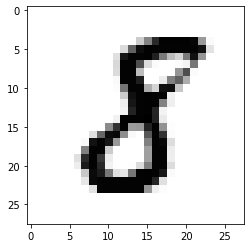

In [111]:
import matplotlib.pyplot as plt
import random

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
print("Prediction:", sess.run(tf.argmax(hypothesis, 1), 
                      feed_dict={x: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()
#추가여서 복사했다
#matplotlib를 이용하여 시각화도 가능하다